In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten,Dropout
import matplotlib.pyplot as plt
from keras.applications import VGG16,InceptionV3,ResNet50
from keras.optimizers import Adam

In [2]:
train_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\train'
test_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\test'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)



In [3]:

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size = 4
)

# validation_gen = train.flow_from_directory(
#     train_dir,
#     target_size = (128, 128),
#     batch_size = 4
#     validation_split = 0.1
# )

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size = 4,
    
)

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [4]:
x_train, y_train = train_gen.next()
x_test, y_test =test_gen.next()

In [5]:
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [10]:
#Adding Customized Layer
x = Flatten()(base_model.output)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)

output_layer = Dense(3, activation = 'softmax')(x)

In [11]:
model = Model(inputs = base_model.input, outputs = output_layer)

In [12]:
# Prevent the weights from being updated by freezing the base layers
for layer in base_model.layers:
    layer.trainable = False

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 13, 13, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 13, 13, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 13, 13, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 13, 13, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 13, 13, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 13, 13, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 6, 6, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 6, 6, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 6, 6, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 6, 6, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 6, 6, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 6, 6, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 6, 6, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 6, 6, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 6, 6, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 6, 6, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 6, 6, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 6, 6, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 6, 6, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 2, 2, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 2, 2, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 2, 2, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 2, 2, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 2, 2, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [14]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.1155 - accuracy: 1.0000 - val_loss: 1.7128 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 69ms/step - loss: 1.8914e-05 - accuracy: 1.0000 - val_loss: 1.0374 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 68ms/step - loss: 3.9736e-08 - accuracy: 1.0000 - val_loss: 0.5187 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.00

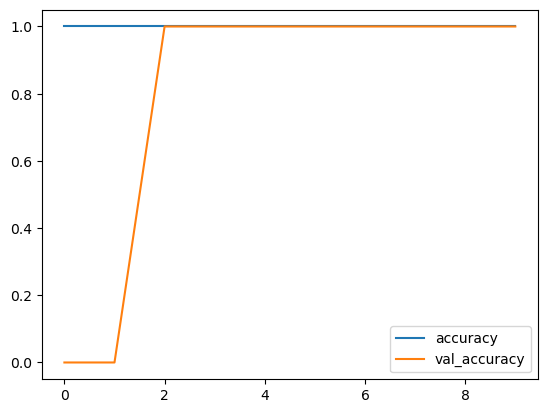

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

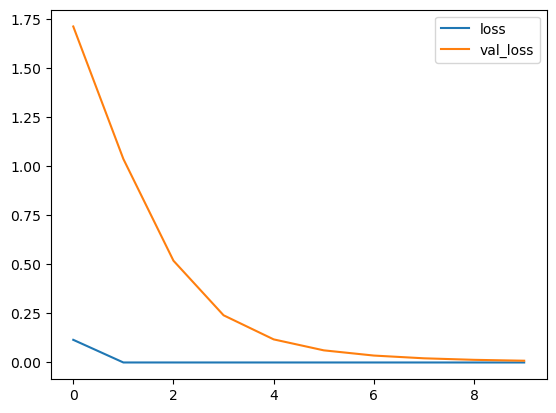

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model

#You need to install numba using 'pip install numba'

from numba import cuda

cuda.select_device(0)
cuda.close()